In [605]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sounddevice as sd

## Task 1:
This task consist of three parts. 1a), 1b) and 1c) 
We want to generate two sine signals x1(t) and x2(t), 

    x1(t): with period,  T1 = 0.01 s 
    
    x2(t): with frequency,  f2 = 1000 Hz 
    
for the interval 0 s ≤ t < 5 s. Both signals should have amplitude 1 and zero phase shift. Where the angular frequency ω is calculated using the following:
$$
ω=2πf
$$

$$
f = \frac{1}{T}
$$

where T stands for period and f for frequency

In [606]:
start = 0   # Start value
stop = 5  # Stop value
increment = 0.00001  # Increment value (TODO: we might want to make this even smaller?)

t = np.arange(start, stop, increment)

# Generate the signals
T1 = 0.01  # Period for x1(t) in seconds
f2 = 1000  # Frequency for x2(t) in Hz

# Generate thie sin signal x1(t) with period T1
x1 = np.sin(2 * np.pi * t / T1)

# Generate thie sin signal x2(t) with frequency f2
x2 = np.sin(2 * np.pi * f2 * t)


### 1a)

We want to figure out x1(t) and x2(t) natural frequencies, angular frequencies, and
periods.

 
$$
Natural frequency:      f = \frac{1}{T} , (T = periods)
$$


|          | Natural freq (Hz) |Angular freq (rad/s)|  Periods (s) |
|----------|-------------------|--------------------|--------------|
| $$X1(t)$$|       $$100$$     |     $$2π100$$      |    $$0.01$$  |
| $$X2(t)$$|       $$1000$$    |     $$2π1000$$     |   $$0.001$$  |

### 1b) 
Plot x1 and x2 in the interval $$ 0 < t < 10ms $$

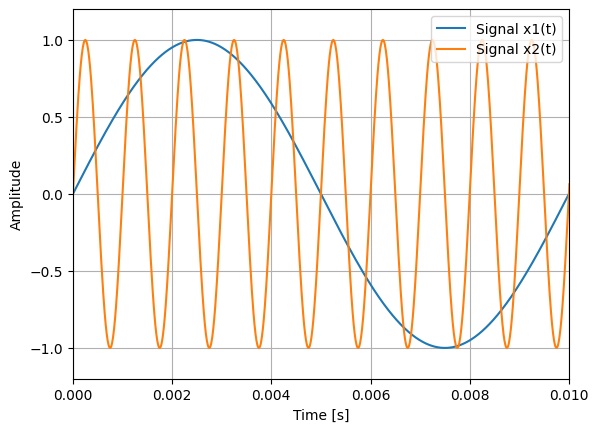

In [607]:
# Create a new figure
fig, ax = plt.subplots()

# Plot the curve with x-values 't' and y-values 'x' into the figure 'ax' with the legend entry 'My Signal'
ax.plot(t, x1, label='Signal x1(t)')
ax.plot(t, x2, label='Signal x2(t)')


ax.set_xlabel('Time [s]')  # Add x-axis label
ax.set_ylabel('Amplitude') # Add y-axis label
ax.set_xlim(0, 0.01)       # Set x-axis limits 0-10 ms
ax.set_ylim(-1.2, 1.2)     # Set y-axis limits
ax.grid(True)              # Turn on the grid
ax.legend(loc='upper right') # Add legend
plt.show()                 # Show the plot

### 1c)



In [608]:
#sd.play(x2, 100000, blocking=True)

In [609]:
#sd.play(x1, 100000, blocking=True)

## Task 2)


### 2a)

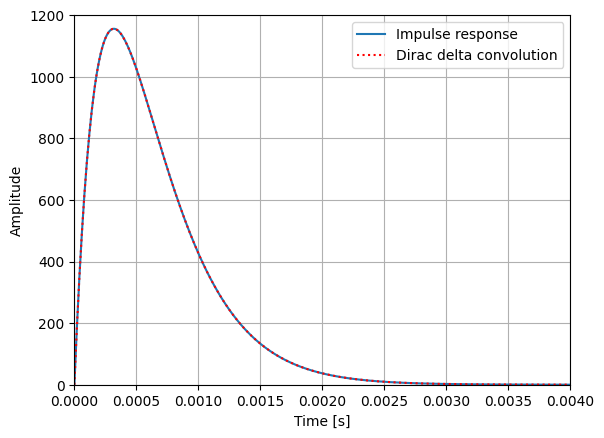

In [610]:
alpha = 1000*np.pi
t2_start = 0
t2_stop = 0.02
t2_increment = 0.00001

t2 = np.arange(t2_start, t2_stop, t2_increment )
u = 1

h = alpha**2 * t2 * np.exp(-alpha * t2) * u


d = np.zeros(t2.shape)
d[0] = 1 / t2_increment

# Perform the convolution
y = t2_increment * signal.convolve(d, h, method='direct')

y = y[0:d.shape[0]]

fig2, ax = plt.subplots()

# Plot the curve with x-values 't' and y-values 'x' into the figure 'ax' with the legend entry 'My Signal'
ax.plot(t2, h, label='Impulse response')
ax.plot(t2, y, label='Dirac delta convolution', linestyle = "dotted", color = "red")

ax.set_xlabel('Time [s]')  # Add x-axis label
ax.set_ylabel('Amplitude') # Add y-axis label
ax.set_xlim(0, 0.004)      # Set x-axis limits 0-10 ms
ax.set_ylim(0, 1200)       # Set y-axis limits
ax.grid(True)              # Turn on the grid
ax.legend(loc='upper right') # Add legend
plt.show()                 # Show the plot


### 2b)


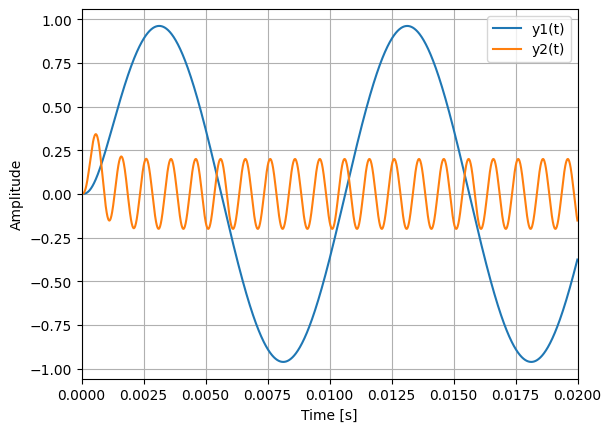

In [611]:
# Generate the signals
T1 = 0.01  # Period for x1(t) in seconds
f2 = 1000  # Frequency for x2(t) in Hz

# Generate thie sin signal x1(t) with period T1
x1 = np.sin(2 * np.pi * t2 / T1)

# Generate thie sin signal x2(t) with frequency f2
x2 = np.sin(2 * np.pi * f2 * t2)

# Perform the convolution for x1 and x2
y1 = t2_increment * signal.convolve(x1, h, method='direct')
y2 = t2_increment * signal.convolve(x2, h, method='direct')

y1 = y1[0:x1.shape[0]]

y2 = y2[0:x2.shape[0]]

fig3, ax = plt.subplots()

# Plot the curve with x-values 't' and y-values 'x' into the figure 'ax'
ax.plot(t2, y1, label='y1(t)')
ax.plot(t2, y2, label='y2(t)')

ax.set_xlabel('Time [s]')  # Add x-axis label
ax.set_ylabel('Amplitude') # Add y-axis label
ax.set_xlim(0, 0.02)       # Set x-axis limits 0-20 ms
ax.grid(True)              # Turn on the grid
ax.legend(loc='upper right') # Add legend
plt.show()                 # Show the plot


### 2c)

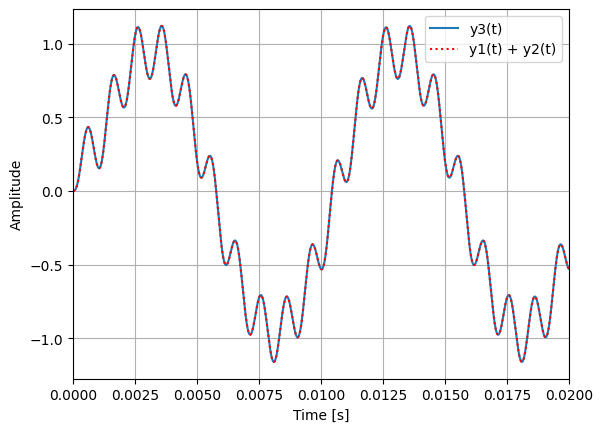

In [612]:
#We want to add x3(t) = x1(t) + x2(t)
x3 = x1 + x2

y3 = t2_increment * signal.convolve(x3, h, method='direct')
y3 = y3[0:x3.shape[0]]


# Plot y3(t) and y1(t)+y2(t)
fig4, ax = plt.subplots()

ax.plot(t2, y3, label='y3(t)')                 # Plot y3(t)
ax.plot(t2, (y1 + y2), label='y1(t) + y2(t)',  linestyle = "dotted", color = "red")  # Plot y1(t) + y2(t)
#ax.plot(t2, y1, label='y3(t)')                 # Plot y3(t)

ax.set_xlabel('Time [s]')    # Add x-axis label
ax.set_ylabel('Amplitude')   # Add y-axis label
ax.set_xlim(0, 0.02)         # Set x-axis limits 0-20 ms
ax.grid(True)                # Turn on the grid
ax.legend(loc='upper right') # Add legend
plt.show()                   # Show the plot